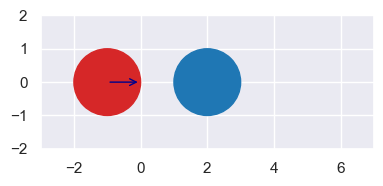

In [1]:
from perfect_physics import Circle, plot

a = Circle(x=-1, y=0, r=1, vx=1, vy=0, m=1)
b = Circle(x=2, y=0, r=1, vx=0, vy=0, m=1)
plot([a, b], colors=["tab:red", "tab:blue"], xlim=(-3, 7), ylim=(-2, 2), figsize=(4, 2), font_scale=1)

pass  # avoid showing the plot twice

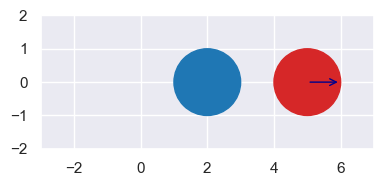

In [2]:
a = Circle(x=5, y=0, r=1, vx=1, vy=0, m=1)
b = Circle(x=2, y=0, r=1, vx=0, vy=0, m=1)
plot([a, b], colors=["tab:red", "tab:blue"], xlim=(-3, 7), ylim=(-2, 2), figsize=(4, 2), font_scale=1)

pass

In [3]:
from sympy import symbols, limit, sqrt
from perfect_physics import save
a_x, a_y, a_vx, a_vy, b_x, b_y, b_vx, b_vy, t = symbols("a_x, a_y, a_vx, a_vy, b_x, b_y, b_vx, b_vy, t")
d0 = sqrt((a_x - b_x) ** 2 + (a_y - b_y) ** 2)
d1 = sqrt((a_x + t * a_vx - (b_x + t * b_vx)) ** 2 + (a_y + t * a_vy - (b_y + t * b_vy)) ** 2)
speed_toward = (d0 - d1) / t
instant_speed = limit(speed_toward, t, 0)
save(instant_speed, "instant_speed.sympy")
instant_speed

(-2*a_vx*a_x**3 + 6*a_vx*a_x**2*b_x - 2*a_vx*a_x*a_y**2 + 4*a_vx*a_x*a_y*b_y - 6*a_vx*a_x*b_x**2 - 2*a_vx*a_x*b_y**2 + 2*a_vx*a_y**2*b_x - 4*a_vx*a_y*b_x*b_y + 2*a_vx*b_x**3 + 2*a_vx*b_x*b_y**2 - 2*a_vy*a_x**2*a_y + 2*a_vy*a_x**2*b_y + 4*a_vy*a_x*a_y*b_x - 4*a_vy*a_x*b_x*b_y - 2*a_vy*a_y**3 + 6*a_vy*a_y**2*b_y - 2*a_vy*a_y*b_x**2 - 6*a_vy*a_y*b_y**2 + 2*a_vy*b_x**2*b_y + 2*a_vy*b_y**3 + 2*a_x**3*b_vx + 2*a_x**2*a_y*b_vy - 6*a_x**2*b_vx*b_x - 2*a_x**2*b_vy*b_y + 2*a_x*a_y**2*b_vx - 4*a_x*a_y*b_vx*b_y - 4*a_x*a_y*b_vy*b_x + 6*a_x*b_vx*b_x**2 + 2*a_x*b_vx*b_y**2 + 4*a_x*b_vy*b_x*b_y + 2*a_y**3*b_vy - 2*a_y**2*b_vx*b_x - 6*a_y**2*b_vy*b_y + 4*a_y*b_vx*b_x*b_y + 2*a_y*b_vy*b_x**2 + 6*a_y*b_vy*b_y**2 - 2*b_vx*b_x**3 - 2*b_vx*b_x*b_y**2 - 2*b_vy*b_x**2*b_y - 2*b_vy*b_y**3)/(2*a_x**2*sqrt(a_x**2 - 2*a_x*b_x + a_y**2 - 2*a_y*b_y + b_x**2 + b_y**2) - 4*a_x*b_x*sqrt(a_x**2 - 2*a_x*b_x + a_y**2 - 2*a_y*b_y + b_x**2 + b_y**2) + 2*a_y**2*sqrt(a_x**2 - 2*a_x*b_x + a_y**2 - 2*a_y*b_y + b_x**2 + b_y**2

In [7]:
from sympy import symbols, linsolve, Eq, simplify
from perfect_physics import load, save
a_x, a_y, a_vx, a_vy, t = symbols("a_x, a_y, a_vx, a_vy, t")
x0, y0, x1, y1, x2, y2, p = symbols("x_0, y_0, x_1, y_1, x_2, y_2, p")
eq1 = Eq(x2, a_x + a_vx * t)
eq2 = Eq(y2, a_y + a_vy * t)
eq3 = Eq(x2, x0 + (x1-x0) * p)
eq4 = Eq(y2, y0 + (y1-y0) * p)
x2_formula, y2_formula, _, _ = list(linsolve([eq1, eq2, eq3, eq4], (x2, y2, p, t)))[0]
instant_speed = load("instant_speed.sympy")
instant_speed_wall = simplify(instant_speed.subs({"b_x": x2_formula, "b_y": y2_formula, "b_vx": 0, "b_vy": 0}))
save(instant_speed_wall, "instant_speed_wall.sympy")
instant_speed_wall

(-a_vx**2*a_x*y_0 + a_vx**2*a_x*y_1 + a_vx**2*a_y*x_0 - a_vx**2*a_y*x_1 - a_vx**2*x_0*y_1 + a_vx**2*x_1*y_0 - a_vy**2*a_x*y_0 + a_vy**2*a_x*y_1 + a_vy**2*a_y*x_0 - a_vy**2*a_y*x_1 - a_vy**2*x_0*y_1 + a_vy**2*x_1*y_0)/(sqrt((a_vx**2*a_x**2*y_0**2 - 2*a_vx**2*a_x**2*y_0*y_1 + a_vx**2*a_x**2*y_1**2 - 2*a_vx**2*a_x*a_y*x_0*y_0 + 2*a_vx**2*a_x*a_y*x_0*y_1 + 2*a_vx**2*a_x*a_y*x_1*y_0 - 2*a_vx**2*a_x*a_y*x_1*y_1 + 2*a_vx**2*a_x*x_0*y_0*y_1 - 2*a_vx**2*a_x*x_0*y_1**2 - 2*a_vx**2*a_x*x_1*y_0**2 + 2*a_vx**2*a_x*x_1*y_0*y_1 + a_vx**2*a_y**2*x_0**2 - 2*a_vx**2*a_y**2*x_0*x_1 + a_vx**2*a_y**2*x_1**2 - 2*a_vx**2*a_y*x_0**2*y_1 + 2*a_vx**2*a_y*x_0*x_1*y_0 + 2*a_vx**2*a_y*x_0*x_1*y_1 - 2*a_vx**2*a_y*x_1**2*y_0 + a_vx**2*x_0**2*y_1**2 - 2*a_vx**2*x_0*x_1*y_0*y_1 + a_vx**2*x_1**2*y_0**2 + a_vy**2*a_x**2*y_0**2 - 2*a_vy**2*a_x**2*y_0*y_1 + a_vy**2*a_x**2*y_1**2 - 2*a_vy**2*a_x*a_y*x_0*y_0 + 2*a_vy**2*a_x*a_y*x_0*y_1 + 2*a_vy**2*a_x*a_y*x_1*y_0 - 2*a_vy**2*a_x*a_y*x_1*y_1 + 2*a_vy**2*a_x*x_0*y_0*y_1 - 2*a

sqrt(5)

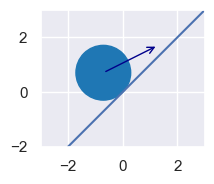

In [8]:
from sympy import sqrt
from perfect_physics import Circle, Wall, plot, load
a = Circle(x=-sqrt(2) / 2, y=sqrt(2) / 2, r=1, vx=2, vy=1)
w = Wall(x0=-1, y0=-1, x1=1, y1=1)
plot(circle_list=[a], wall_list=[w], xlim=(-3, 3), ylim=(-2, 3), figsize=(4, 2), font_scale=1)
instant_speed_wall = load("instant_speed_wall.sympy")
instant_speed_wall.subs({"a_x": a.x, "a_y": a.y, "a_vx": a.vx, "a_vy": a.vy,
                         "x_0": w.x0, "y_0": w.y0, "x_1": w.x1, "y_1": w.y1})